In [64]:
import mne 
import os
import numpy as np

In [47]:
def eegPath(path):
    folderPath = os.listdir(path)
    fifFilePath = ""
    #print(folder)
    for file in folderPath:
        if '.fif' in file:
            fifFilePath  = os.path.join(path, file)
    print(fifFilePath)       

In [48]:
path = "/Users/tarekulislam/Desktop/seniorprojecteeg/Tarekul_Workspace/capstone2"

In [49]:
fif_file = eegPath(path)

/Users/tarekulislam/Desktop/seniorprojecteeg/Tarekul_Workspace/capstone2/20140306_1133-epo.fif


In [50]:
mne.read_epochs(fif_file,preload=True)

AttributeError: 'NoneType' object has no attribute 'endswith'

In [52]:
epoch = mne.read_epochs("/Users/tarekulislam/Desktop/seniorprojecteeg/Tarekul_Workspace/capstone2/20140306_1133-epo.fif",preload=True)

Reading /Users/tarekulislam/Desktop/seniorprojecteeg/Tarekul_Workspace/capstone2/20140306_1133-epo.fif ...
    Found the data of interest:
        t =       0.00 ...    1949.22 ms
        0 CTF compensation matrices available
984 matching events found
Applying baseline correction (mode: mean)
984 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [54]:
epoch.ch_names

['Lm',
 'LE1',
 'Nasium',
 'LE3',
 'LD2',
 'LD5',
 'LC3',
 'LC6',
 'LB1',
 'LB4',
 'LA2',
 'LA5',
 'LL1',
 'LL4',
 'LL7',
 'LL10',
 'LL13',
 'L3',
 'L6',
 'L9',
 'L12',
 'Z1',
 'Z4',
 'Z7',
 'Z10',
 'Z13',
 'R3',
 'R6',
 'R9',
 'R12',
 'RR1',
 'RR4',
 'RR7',
 'RR10',
 'RR13',
 'RA2',
 'RA5',
 'RB1',
 'RB4',
 'RC3',
 'RC6',
 'RD2',
 'RD5',
 'RE1',
 'VEOG',
 'RE3',
 'Rm',
 'RE4',
 'RD1',
 'RD3',
 'RD4',
 'RD6',
 'RD7',
 'RC1',
 'RC2',
 'RC4',
 'RC5',
 'RC7',
 'RB2',
 'RB3',
 'RB5',
 'RB6',
 'RA1',
 'RA3',
 'RA4',
 'RR2',
 'RR3',
 'RR5',
 'RR6',
 'RR8',
 'RR9',
 'RR11',
 'RR12',
 'R1',
 'R2',
 'R4',
 'R5',
 'R7',
 'R8',
 'R10',
 'R11',
 'R13',
 'R14',
 'Z2',
 'Z3',
 'Z5',
 'Z6',
 'Z8',
 'Z9',
 'Z11',
 'Z12',
 'Z14',
 'L1',
 'L2',
 'L4',
 'L5',
 'L7',
 'L8',
 'L10',
 'L11',
 'L13',
 'L14',
 'LL2',
 'LL3',
 'LL5',
 'LL6',
 'LL8',
 'LL9',
 'LL11',
 'LL12',
 'LA1',
 'LA3',
 'LA4',
 'LB2',
 'LB3',
 'LB5',
 'LB6',
 'LC1',
 'LC2',
 'LC4',
 'LC5',
 'LC7',
 'LD1',
 'LD3',
 'LD4',
 'LD6',
 'LD7',
 

In [57]:
epoch.get_data().shape

(984, 129, 500)

In [166]:
#epoch = epoch.drop_channels(['Lm', 'Rm' ,'VEOG','STI 014'])
epoch = epoch.drop_channels(['STI 014'])

In [167]:
epoch.get_data().shape

(984, 125, 500)

In [168]:
"""
understanding variance and get ch 2 as outside boundaries of std deviation
"""
arr =  [[124,125,126,127],  #ch 1
        [123,2,124,125],    #ch 2
        [127,125,121,123],  #ch 3
        [123,124,-5,126],  #ch 4
        [122,127,123,125]]  #ch 5

arr1 = np.array(arr)
arr1.shape
#print(arr1)
import math
sum = 0
a = np.sum(arr1[0])
b = np.sum(arr[1])
c = np.sum(arr[2]) 
d = np.sum(arr[3])
e = np.sum(arr[4]) 
print("ch 1 is ",a)
print("ch 2 is ",b)
print("ch 3 is ",c)
print("ch 4 is ",d)
print("ch 5 is ",e)

mean = (a+b+c+d+e)/5
print("mean is, ",mean)
print("np mean is ",np.mean(arr1))
variance = (((mean - a)**2) + ((mean - b)**2) + ((mean - c)**2)+ \
                                                ((mean - d)**2) + \
                                                ((mean - e)**2)) / 5
print("variance =",variance)

std = math.sqrt(variance)
print(std)

normal = mean + std 
normal2 = mean - std

print(normal)
print(normal2)

ch 1 is  502
ch 2 is  374
ch 3 is  496
ch 4 is  368
ch 5 is  497
mean is,  447.4
np mean is  111.85
variance = 3899.04
62.44229335954918
509.84229335954916
384.9577066404508


In [169]:
"""
understanding variance and get ch 2 as outside boundaries of std deviation
"""
arr2 =  [[124,125,126,127],  #ch 1
        [123,127,124,125],    #ch 2
        [127,125,121,123],  #ch 3
        [123,124,122,126],  #ch 4
        [122,127,123,125]]  #ch 5

arr2 = np.array(arr2)
arr2.shape
#print(arr1)
import math
sum = 0
a = np.sum(arr2[0])
b = np.sum(arr2[1])
c = np.sum(arr2[2]) 
d = np.sum(arr2[3])
e = np.sum(arr2[4]) 
print("ch 1 is ",a)
print("ch 2 is ",b)
print("ch 3 is ",c)
print("ch 4 is ",d)
print("ch 5 is ",e)

mean = (a+b+c+d+e)/5
print("mean is, ",mean)
print("np mean is ",np.mean(arr1))
variance = (((mean - a)**2) + ((mean - b)**2) + ((mean - c)**2)+ \
                                                ((mean - d)**2) + \
                                                ((mean - e)**2)) / 5
print("variance =",variance)

std = math.sqrt(variance)
print(std)

normal = mean + std 
normal2 = mean - std

print(normal)
print(normal2)

ch 1 is  502
ch 2 is  499
ch 3 is  496
ch 4 is  495
ch 5 is  497
mean is,  497.8
np mean is  111.85
variance = 6.16
2.4819347291981715
500.28193472919816
495.31806527080187


In [619]:
"""
understanding variance and get ch 2 as outside boundaries of std deviation
"""
arr3 =  [[0.5,-0.2,0.3,-0.3],  #ch 1 = 0.3
        [0.4,-0.2,0.4,-0.1],  #ch 2 = 0.5
        [0.2,-0.5,0.3,-0.4],  #ch 3 = -0.4
        [0.1,-0.2,1.1,-1.2],  #ch 4 = 0.1
        [0.4,-0.2,0.4,-0.1]]  #ch 5 =  0.5

arr3 = np.array(arr3)

#print(arr1)
import math
hold = []
hold.append(np.sum(arr3[0]))
f = np.sum(arr3[0])
hold.append(np.sum(arr3[1]))
g = np.sum(arr3[1])
hold.append(np.sum(arr3[2]))
h = np.sum(arr3[2]) 
hold.append(np.sum(arr3[3]))
i = np.sum(arr3[3])
hold.append(np.sum(arr3[4]))
j = np.sum(arr3[4]) 
print("ch 1 is ",f)
print("ch 2 is ",g)
print("ch 3 is ",h)
print("ch 4 is ",i)
print("ch 5 is ",j)

mean2 = np.mean(hold)
print("mean is, ",mean2)

v=0
for k in hold:
    v += (mean2 - k)**2

v = v/5
print("variance =",v)

std2 = np.std(hold)
print("std2 is ",std2)
std = math.sqrt(v)
print("standard deviation", std)

normale = math.ceil(mean2 + std)
normal2e = math.floor(mean2- std)

print("normal std:" ,normale)
print("normal std 2:",normal2e)
print("")
for i in arr3:
    for p in i:
        if p > normale or p < normal2e:
            print(p)
            
#print(np.array(arr3).shape[0] * np.array(arr3).shape[1])            

ch 1 is  0.3
ch 2 is  0.5000000000000001
ch 3 is  -0.4
ch 4 is  -0.19999999999999996
ch 5 is  0.5000000000000001
mean is,  0.14000000000000004
variance = 0.13840000000000002
std2 is  0.37202150475476553
standard deviation 0.37202150475476553
normal std: 1
normal std 2: -1

1.1
-1.2


In [ ]:
import matplotlib.pyplot as plt
x = np.arange(0,20,1)
y = [0.5,-0.2,0.3,-0.3,0.4,-0.2,0.4,-0.1,0.2,-0.5,0.3,-0.4,0.1,-0.2,1.1,-1.2,0.4,-0.2,0.4,-0.1]
_ = plt.plot(x,y)

y = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
y2 = [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
_ = plt.plot(x,y)
_ = plt.plot(x,y2)

In [832]:
wordEpochs = epoch[(epoch.events[:,-1]==2) | (epoch.events[:,-1]==1)].copy()

In [863]:
wordEpochs.get_data()[0]

array([[ 0.00000000e+00,  1.67594075e-07, -5.33031987e-06, ...,
        -1.74064731e-05, -8.61430357e-06, -5.81535433e-06],
       [ 0.00000000e+00, -2.04089832e-06, -5.93303631e-06, ...,
        -4.68577527e-06, -1.08436508e-05, -1.29231987e-05],
       [ 0.00000000e+00, -1.06477213e-06, -6.43172978e-07, ...,
        -4.11269330e-06, -4.67379760e-06, -6.69290016e-06],
       ...,
       [ 0.00000000e+00, -4.83458470e-06, -7.29134796e-06, ...,
        -2.09512090e-06, -7.78913353e-06, -5.00693844e-06],
       [ 0.00000000e+00,  5.13467907e-07,  1.06802864e-05, ...,
         6.64023064e-06,  4.32075499e-06, -1.02966094e-06],
       [ 0.00000000e+00, -2.53321826e-07,  6.58559321e-06, ...,
         7.09696768e-06,  7.32367466e-06, -2.81588125e-06]])

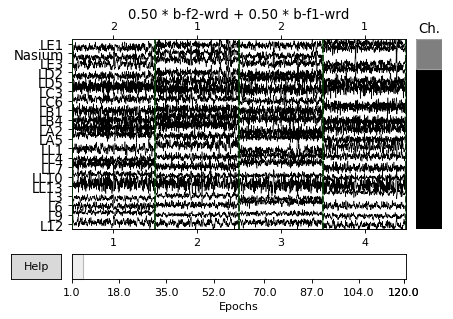

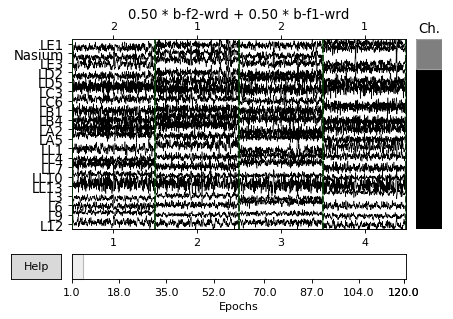

In [872]:
mne.viz.plot_epochs(wordEpochs,n_epochs=4)

In [910]:
"""
Find std of each channel. Than find how many points are abnormal. Than keep count. Do same thing
for each channel. than keep a master count of all point abnormal for all channels. The time point
that has highest count is our signal.
"""
def getVar(epo_data,segmentStartPoint):
    #put all channel data in master array
    ChannelsSegmentData = [] #125 x 49
    for channel in epo_data[8]:
        temp = []
        for i in range(segmentStartPoint,10+segmentStartPoint):
            #print(i)
            temp.append(channel[i])
        ChannelsSegmentData.append(temp)   
    
    #loop over array and for each channel find the std deviation
    masterarr = 0
    for datas in ChannelsSegmentData:
        mean = np.mean(datas)
        std = np.std(datas)
        deviationUp = mean + std
        deviationDown = mean - std
        count = 0
        for i in datas:
            if i < deviationDown or i > deviationUp:
                count+=1
        masterarr+= count 
    
#     total = np.array(ChannelsSegmentData).shape[0] * np.array(ChannelsSegmentData).shape[1]
#     print(total)
#     print(total - masterarr)
    return masterarr     


In [914]:
wordData = wordEpochs.get_data()
def callgetVar():
    masterArr = []
    for i in range(0,500,10):
        masterArr.append(getVar(wordData,i))
    
    print("masterArr:" ,np.array(masterArr).shape)
    stD = np.std(masterArr)
    meaN = np.mean(masterArr)

    #print("mean: ",meaN)

    stdUp = stD + meaN
    stdDown = meaN - stD

    #print("standDev: ",stdUp)
    #print("standDev: ",stdDown)  
    
    ray = []
    for num in masterArr:
        if num < stdDown or num > stdUp:
            ray.append(num)
    print(np.array(ray).shape)
    print("unnnormal: ",ray)
    
    indexes = []
    for idx,val in enumerate(masterArr):
        for itr in ray:
            if val == itr:
                if idx not in indexes:
                    indexes.append(idx)
                
                
    print("unnormal indexes: ",indexes)       
    
    timeSegment = []
    
    for p in indexes:
        timeSegment.append((p+1)*10)
        
        
    print("segments of epoch with signal",timeSegment)    
    return masterArr

In [915]:
hold = callgetVar()

masterArr: (50,)
(14,)
unnnormal:  [464, 409, 418, 469, 458, 465, 422, 485, 420, 417, 419, 477, 422, 420]
unnormal indexes:  [0, 4, 7, 10, 11, 14, 16, 19, 24, 28, 34, 40, 47, 48]
segments of epoch with signal [10, 50, 80, 110, 120, 150, 170, 200, 250, 290, 350, 410, 480, 490]


439.9
455.8865568525558
423.9134431474441
ray is  (14,)
hold is  (50,)


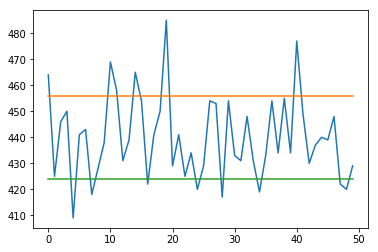

In [913]:
x = np.arange(0,50,1)
_ = plt.plot(x,hold)

stD = np.std(hold)
meaN = np.mean(hold)

print(meaN)

stdUp = stD + meaN
stdDown = meaN - stD

print(stdUp)
print(stdDown)

up = [stdUp] * 50
down = [stdDown] * 50
_ = plt.plot(x,up)
_ = plt.plot(x,down)

ray = []
for num in hold:
    if num < stdDown or num > stdUp:
        ray.append(num)
        
print("ray is ",np.array(ray).shape)    
print("hold is ",np.array(hold).shape)    